#Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score
from sklearn.metrics import roc_curve,auc,log_loss,accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score

#Importing Dataset

In [ ]:
df=pd.read_csv("diabetes-2-1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis

## Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns
#Here, Independent Features -> Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
#Dependent Feature -> Outcome

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#(row,columns)
df.shape

(768, 9)

In [ ]:
# distribution of the dependent variable
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

## Visualizing Features' Distribution

Text(0.5, 1.0, 'Outcome Count')

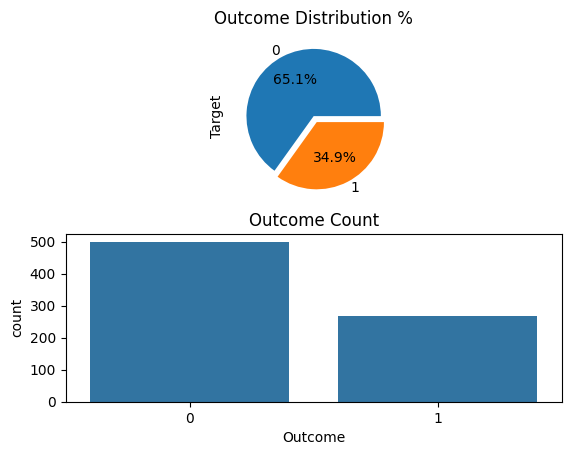

In [ ]:
# Visualizing the distribution of Outcome variable
fig,axes = plt.subplots(2,1)
df["Outcome"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0])
# Setting the title for the piechart
axes[0].set_title("Outcome Distribution %")
axes[0].set_ylabel("Target")
sns.countplot(x="Outcome",data=df,ax=axes[1])
axes[1].set_title("Outcome Count")


<Axes: xlabel='Age', ylabel='Count'>

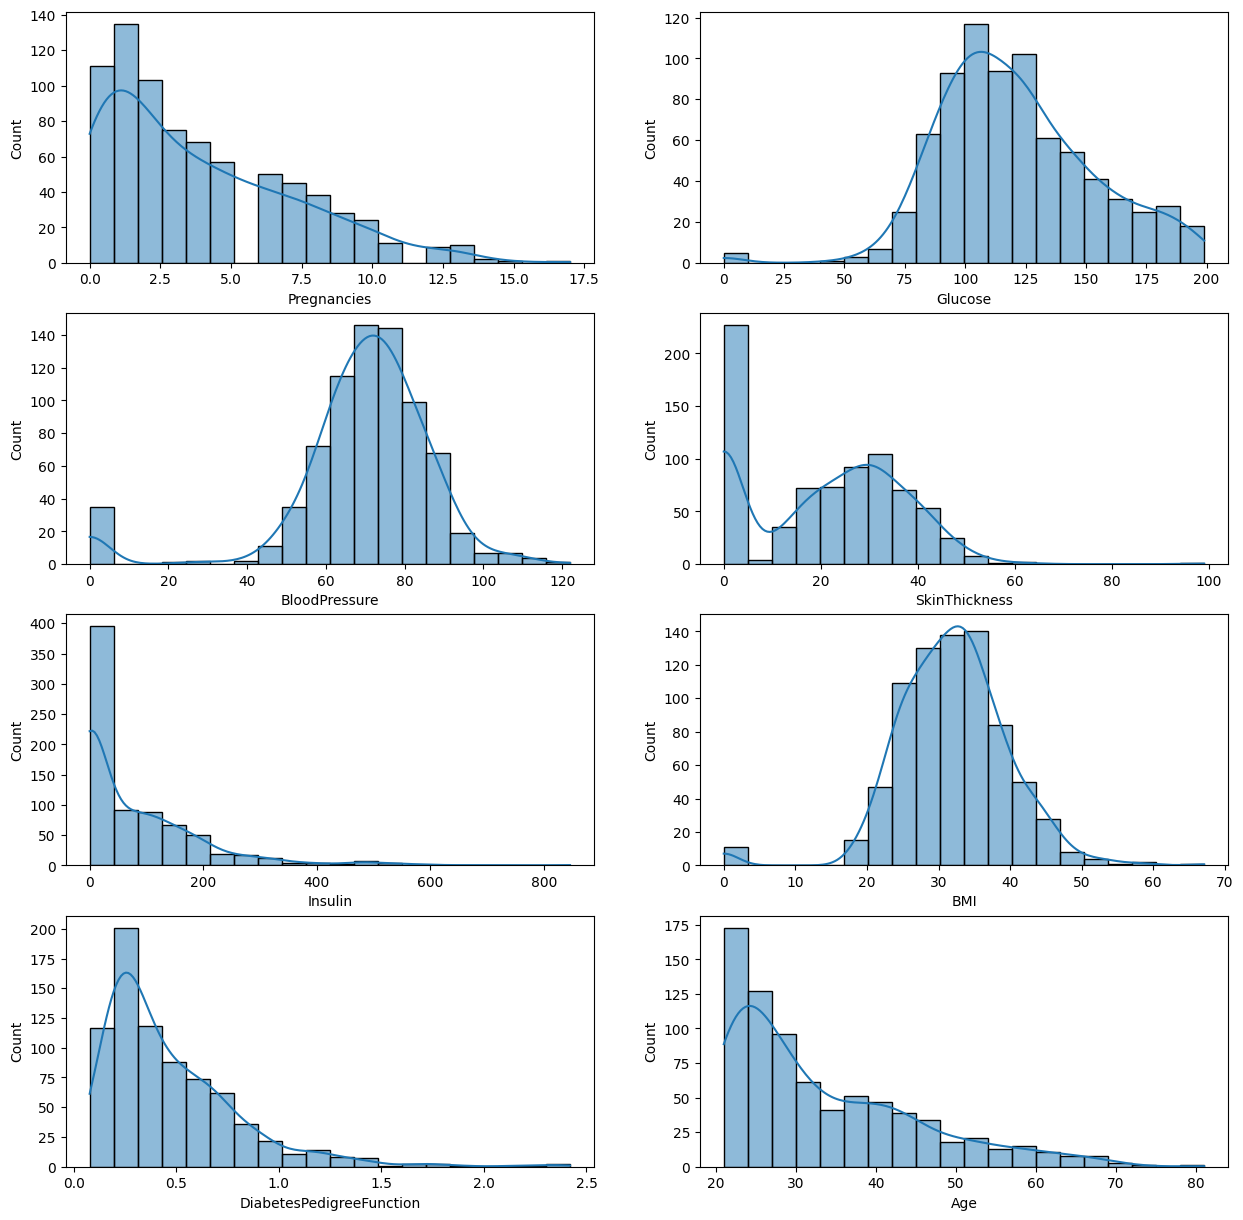

In [ ]:
# density graph
# Columns = 2 figures, Rows = 4 figures
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Plot each distribution on a separate subplot using histplot
sns.histplot(df["Pregnancies"], bins=20, ax=axes[0, 0],kde=True)
sns.histplot(df["Glucose"], bins=20, ax=axes[0, 1],kde=True)
sns.histplot(df["BloodPressure"], bins=20, ax=axes[1, 0],kde=True)
sns.histplot(df["SkinThickness"], bins=20, ax=axes[1, 1],kde=True)
sns.histplot(df["Insulin"], bins=20, ax=axes[2, 0],kde=True)
sns.histplot(df["BMI"], bins=20, ax=axes[2, 1],kde=True)
sns.histplot(df["DiabetesPedigreeFunction"], bins=20, ax=axes[3, 0],kde=True)
sns.histplot(df["Age"], bins=20, ax=axes[3, 1],kde=True)


#Data Preprocessing

## Handling missing & duplicate values

In [ ]:
# Checking for null or missing values in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Checking 0's count in each column as 0(zero) is not acceptable for
# columns except Pregnancies and Glucose.
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# So, replacing necessary columns having 0 with the mean value as they could be
# considered as Null values in columns except Pregnancies and Glucose.

zero_unacceptable_cols=["Glucose","BloodPressure","SkinThickness","Insulin",
                        "BMI","DiabetesPedigreeFunction"]
for column in zero_unacceptable_cols:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Feature Selection Method

## Pearson's Correlation

In [ ]:
# Reviewing Correlation between attributes
correlations = round(df.corr(),4)
correlations # 1 represent full positive correlation, -1 represent negative correllation


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0000,0.1299,0.1461,-0.0788,-0.0676,0.0133,-0.0368,0.5504,0.2217
Glucose,0.1299,1.0000,0.1549,0.0418,0.3114,0.2156,0.1194,0.2515,0.4704
BloodPressure,0.1461,0.1549,1.0000,0.2160,0.0944,0.2895,0.0435,0.2468,0.0695
SkinThickness,-0.0788,0.0418,0.2160,1.0000,0.4676,0.3999,0.1797,-0.1323,0.0690
Insulin,-0.0676,0.3114,0.0944,0.4676,1.0000,0.1895,0.1592,-0.0596,0.1384
BMI,0.0133,0.2156,0.2895,0.3999,0.1895,1.0000,0.1411,0.0323,0.2960
DiabetesPedigreeFunction,-0.0368,0.1194,0.0435,0.1797,0.1592,0.1411,1.0000,0.0338,0.1821
Age,0.5504,0.2515,0.2468,-0.1323,-0.0596,0.0323,0.0338,1.0000,0.2290
Outcome,0.2217,0.4704,0.0695,0.0690,0.1384,0.2960,0.1821,0.2290,1.0000


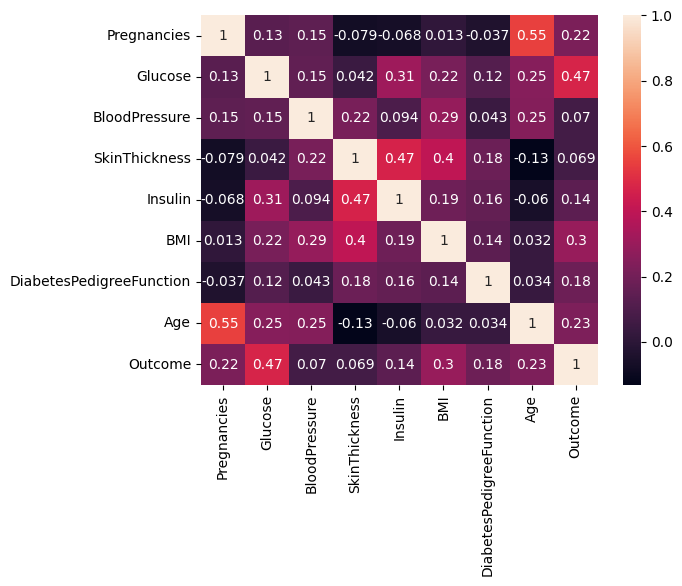

In [ ]:
# Visualize the resulting correlation matrix using a heatmap
sns.heatmap(correlations, annot=True)
plt.show()

In [ ]:
# Loop over bottom diagonal of correlation matrix
counter = 0
for i in range(len(correlations.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(correlations.iloc[i, j]) > 0.8:
            print(correlations.columns[i], correlations.columns[j], correlations.iloc[i, j])
            counter = counter + 1
if counter == 0:
    print('The coefficient of each features not greater than 0.8')

The coefficient of each features not greater than 0.8


In [ ]:
# Correlation matrix for the DataFrame is computed
correlation = df.corr()

# Correlation values with respect to the 'Outcome' variable is extracted
correlation_target = correlation[['Outcome']].drop(labels=['Outcome'])
correlation_target

,Outcome
Pregnancies,0.221651
Glucose,0.470429
BloodPressure,0.069482
SkinThickness,0.068955
Insulin,0.138433
BMI,0.295992
DiabetesPedigreeFunction,0.182062
Age,0.229015


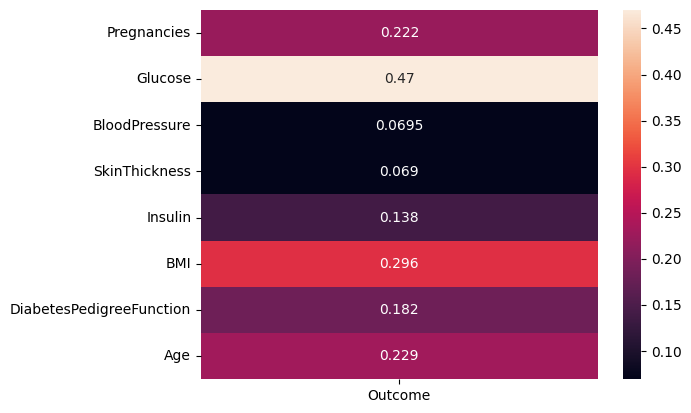

In [ ]:
# Plotting the correlation matrix of the above data
sns.heatmap(correlation_target, annot=True, fmt='.3')
plt.show()

Based on the above correlation target values, although the features "BloodPressure" and "SkinThickness" have values closer to zero, not removing the same considering the fact that in medical domain these features could have some association with diabetes

#Splitting Data to Train and Test

In [ ]:
# Dropping the 'Outcome' column from the DataFrame,
# as it typically represents the target variable
# X represents the features used for prediction
X = df.drop(columns=['Outcome'])

# Selecting only the 'Outcome' column from the DataFrame
# y represents the target variable to be predicted
y = df['Outcome']


In [ ]:
# Splitting the data for training(80%) and testing(20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Shape of training data
X_train.shape

(614, 8)

In [ ]:
# Shape of testing data
X_test.shape

(154, 8)

# Feature Scaling

In [ ]:
# StandardScaler object to scale the features is being initialized
scaler = StandardScaler()

# Scaling the training split of X
X_train = pd.DataFrame(scaler.fit_transform(X_train))
print(X_train.head())

# Scaling the test split of X
X_test=pd.DataFrame(scaler.transform(X_test))
print(X_test.head())

          0         1         2         3         4         5         6  \
0 -0.526397 -1.151398 -3.752683 -1.322774 -0.701206 -4.135256 -0.490735   
1  1.588046 -0.276643  0.680345  0.233505 -0.701206 -0.489169  2.415030   
2 -0.828460  0.566871 -1.265862 -0.090720  0.013448 -0.424522  0.549161   
3 -1.130523  1.254179 -1.049617 -1.322774 -0.701206 -1.303720 -0.639291   
4  0.681856  0.410665  0.572222  1.076490  2.484601  1.838121 -0.686829   

          7  
0 -1.035940  
1  1.487101  
2 -0.948939  
3  2.792122  
4  1.139095  
          0         1         2         3         4         5         6  \
0  0.681856 -0.714020 -0.617127  0.817110  0.934749  0.260736 -0.116372   
1 -0.526397 -0.276643  0.301916  0.752265 -0.701206  0.480535 -0.954231   
2 -0.526397 -0.401608 -0.292759 -1.322774 -0.701206 -0.153005 -0.924520   
3  1.285983 -0.432849  0.572222 -1.322774 -0.701206 -0.954627  1.149329   
4  0.983919  0.473147  1.112835 -1.322774 -0.701206 -0.269369 -0.770021   

          7  


#Defining Functions for Evaluation Matrices

Defining required functions

In [ ]:
# Generic function to plot Confusion Matrix
def conf_matrix_plot(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True,)
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.plot(conf_matrix)
    plt.show()

In [ ]:
# Generic function to plot classification report
def class_report_plot(class_report):
    plt.figure(figsize=(10,3))
    plt.title('Model Classification Report\n\n')
    # Display the visualization of the Classification Report.
    sns.heatmap(class_report, annot=True,  fmt='g')
    plt.show()

# Classification Models

##Logistic Regression

### Basic Model

In [ ]:
# Increasing the number of iterations to prevent 'lbfgs'- logistic regression
# solver convergence issues
logr_model=LogisticRegression(max_iter=1000)

# Fitting the model
logr_model.fit(X_train,y_train)

# Predicting on train and test values if X and evaluating accuracy score
# The initial value of maximum iteration cannot converge
logr_model = LogisticRegression(max_iter=1000)
logr_model.fit(X_train,y_train)
y_pred_logR=logr_model.predict(X_test)
accuracy_score(y_test,y_pred_logR)

0.7532467532467533

In [ ]:

# Calculating Specificity and Sensitivity from Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logR)

TP_logistic = cm_logistic[1, 1]
FP_logistic = cm_logistic[0, 1]
TN_logistic = cm_logistic[0, 0]
FN_logistic = cm_logistic[1, 0]

sensitivity_logistic = TP_logistic / (TP_logistic + FN_logistic)
specificity_logistic = TN_logistic / (TN_logistic + FP_logistic)

print(f"Sensitivity (Recall) for Logistic Regression: {sensitivity_logistic:.4f}")
print(f"Specificity for Logistic Regression: {specificity_logistic:.4f}")


Sensitivity (Recall) for Logistic Regression: 0.6727
Specificity for Logistic Regression: 0.7980


In [ ]:
# Evaluating Logistic Regression model performance using AUC and roc_curve
# Also evaluating using accuracy_score and log_loss functions to calculate additional matrix
y_pred_proba_logR=logr_model.predict_proba(X_test)[:,1] #evaluates probability for each test data prediction

# calculating false +ve rate, true +ve rate and threshold
[fpr_logR,tpr_logR,thr_logR]=roc_curve(y_test,y_pred_proba_logR)

print("Logistic regression Model Perfomance:\n")
print("Logistic Regression basic accuracy score %2.3f" %accuracy_score(y_test,y_pred_logR))
print("Logistic Regression log loss %2.3f" %log_loss(y_test,y_pred_proba_logR))
print("Logistic Regression auc %2.3f" %auc(fpr_logR,tpr_logR))

Logistic regression Model Perfomance:

Logistic Regression basic accuracy score 0.753
Logistic Regression log loss 0.509
Logistic Regression auc 0.815


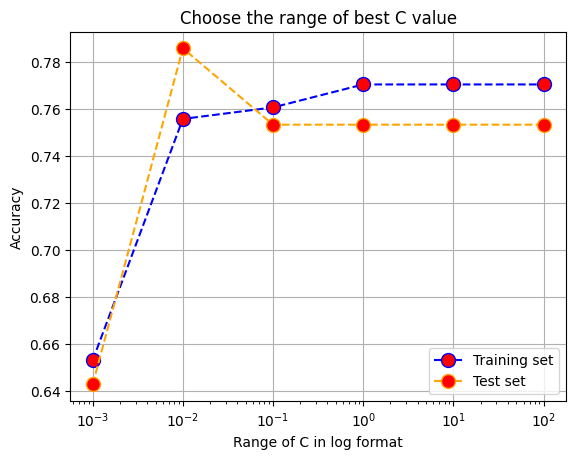

In [ ]:
train_array = []
test_array = []

# Define a range of values for the regularization parameter C
C_array = [0.001, 0.01, 0.1, 1, 10, 100]

# Iterating through each value of "C"
for x in C_array:
    # Initialize a Logistic Regression classifier with specified C and max_iter
    clf_new = LogisticRegression(max_iter=1000, C=x)

    # Fit the classifier to the training data
    clf_new.fit(X_train,y_train)

    # Predict on the training set and calculate accuracy
    y_pred_train = clf_new.predict(X_train)
    train_array.append(accuracy_score(y_pred_train,y_train))

    # Predict on the test set and calculate accuracy
    y_pred_val = clf_new.predict(X_test)
    test_array.append(accuracy_score(y_pred_val,y_test))

# Plot the training and test accuracies for different values of C
plt.plot(C_array,train_array, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(C_array,test_array, color='orange', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.legend(['Training set', 'Test set'])
plt.title('Choose the range of best C value')
plt.xlabel('Range of C in log format')
plt.ylabel('Accuracy')
plt.grid()
plt.xscale('log')
plt.show()


### Hyperparameter Tuned Model

Logistic Regression Model Test set accuracy:  78.57143 %

Logistic Regression Model Confusion Matrix: 



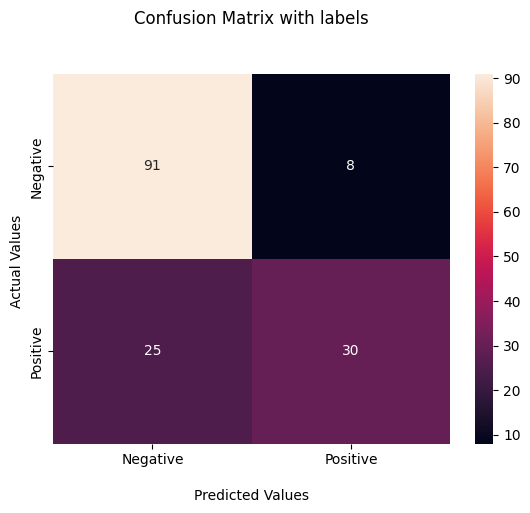

Logistic Regression Model Classification Report: 



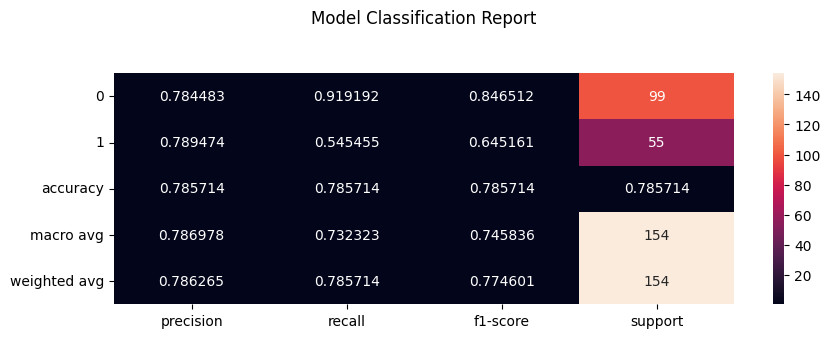

In [ ]:
# Creating a new Logistic Regression Model using tweaked parameters
logr_model_hyper = LogisticRegression(max_iter=10000,C=0.01,penalty='l2',solver='lbfgs')
logr_model_hyper.fit(X_train,y_train)

y_predicted_lr = logr_model_hyper.predict(X_test)
y_prob_lr = logr_model_hyper.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_predicted_lr)
print("Logistic Regression Model Test set accuracy: ", round(accuracy*100,5), "%\n")

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted_lr)
print("Logistic Regression Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

# Plotting Classification Report
class_report = pd.DataFrame(classification_report(y_test,y_predicted_lr, output_dict=True)).transpose()
print("Logistic Regression Model Classification Report: \n")
class_report_plot(class_report)



## Support Vector Classifier (SVC)

### Basic Model

In [ ]:
# Training data on SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

# Predicting on train and test values if X and evaluating accuracy score
y_pred_svm=svm_model.predict(X_test)
accuracy_score(y_test,y_pred_svm)


0.7337662337662337

In [ ]:
# Creating Confusion Matrix and evaluating specificity and sensitifity
cm_svm = confusion_matrix(y_test, y_pred_svm)

TP_svm = cm_svm[1, 1]
FP_svm = cm_svm[0, 1]
TN_svm = cm_svm[0, 0]
FN_svm = cm_svm[1, 0]

sensitivity_svm = TP_svm / (TP_svm + FN_svm)
specificity_svm = TN_svm / (TN_svm + FP_svm)

print(f"Sensitivity (Recall) for SVM: {sensitivity_svm:.4f}")
print(f"Specificity for SVM: {specificity_svm:.4f}")


Sensitivity (Recall) for SVM: 0.5636
Specificity for SVM: 0.8283


### Hyperparameter Tuned Model

In [ ]:
# #finding best parameters for hypertuning
# params = {'C':[1,10,100,1000],
#                   'kernel':['linear','rbf'],
#                   'gamma':[0.001,0.0001]}
# grid = GridSearchCV(svm_model, params, cv=2)

# grid.fit(X_train,y_train)

# print("Best parameters:", grid.best_params_)

# print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

Support Vector Machine Model Test Set Accuracy: 76.62 %

Support Vector Machine Model Confusion Matrix: 



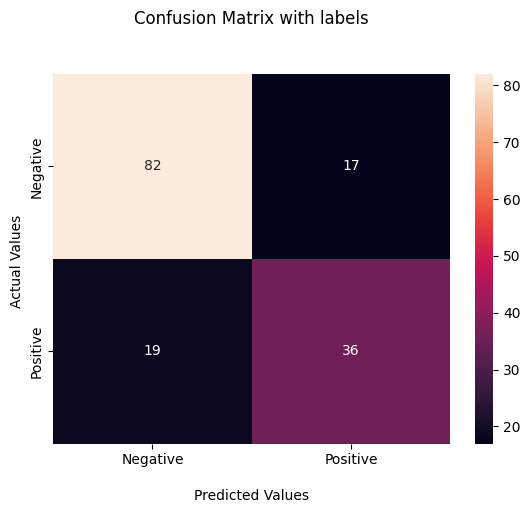

Support Vector Machine Model Classification Report: 



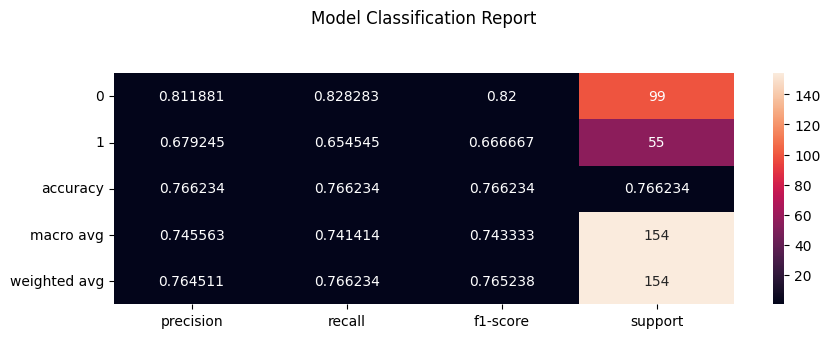

In [ ]:
# Creating a new SVM Model using tweaked parameters
svm_model = SVC(C=1000,
               kernel='rbf',
               gamma=0.0001,
               probability=True)

svm_model.fit(X_train,y_train)
y_predicted_svm = svm_model.predict(X_test)

#  the accuracy of the final model on the test data
accuracy = accuracy_score(y_test,y_predicted_svm)*100
print("Support Vector Machine Model Test Set Accuracy:", round(accuracy,2), "%\n")

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted_svm)
print("Support Vector Machine Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

# Plotting Classification Report
class_report = pd.DataFrame(classification_report(y_test, y_predicted_svm, output_dict=True)).transpose()
print("Support Vector Machine Model Classification Report: \n")
class_report_plot(class_report)

##Random forest Classifier

### Basic Model

In [ ]:
# Training using random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

# Calculating accuracy score of predicted Test value
y_pred_rf=rf_model.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.7272727272727273

In [ ]:
# Calculating Sensitivity and Specificity from Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

TP_rf = cm_rf[1, 1]
FP_rf = cm_rf[0, 1]
TN_rf = cm_rf[0, 0]
FN_rf = cm_rf[1, 0]

sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print(f"Sensitivity (Recall) for Random Forest: {sensitivity_rf:.4f}")
print(f"Specificity for Random Forest: {specificity_rf:.4f}")


Sensitivity (Recall) for Random Forest: 0.6364
Specificity for Random Forest: 0.7778


### Hyperparameter Tuned Model

Test set accuracy is 79.221 % after the maximum depth of the tree was defined is 3


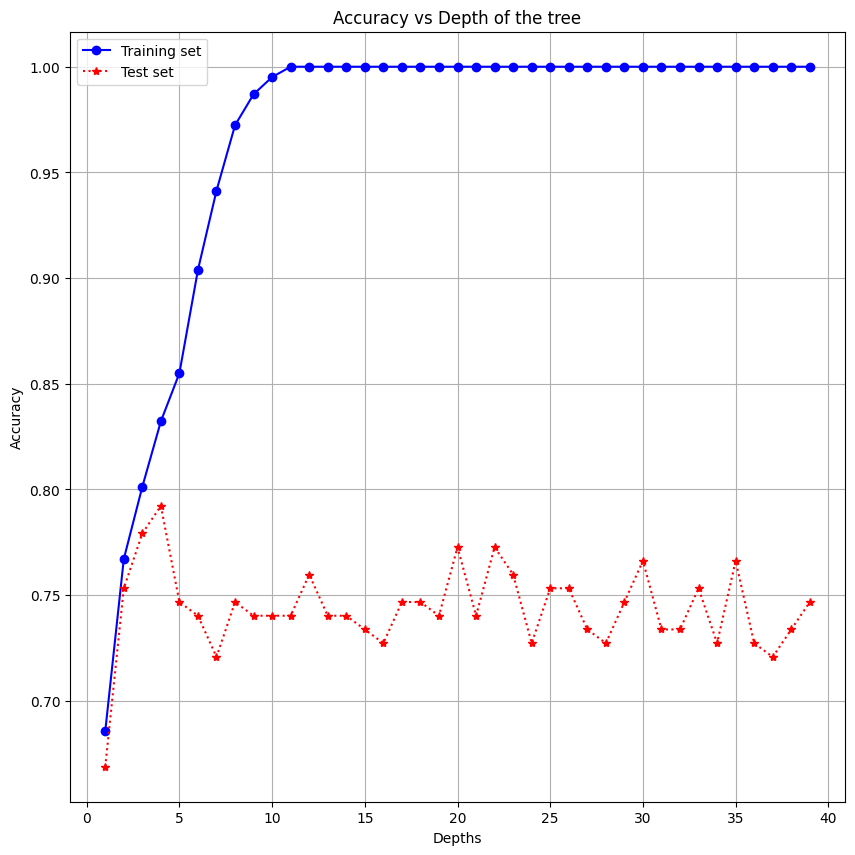

In [ ]:
accuracy_train = []
accuracy_test = []

# Setting seed for reproducibility
np.random.seed(0)

# DeDefining a range of values for the max_depth parameter
depths = range(1,40)

# Iterating through each depth value
for i in depths:
    # Initialize a Random Forest classifier with specified max_depth
    crf = RandomForestClassifier(max_depth=i)

    # Fitting the classifier to the training data
    crf.fit(X_train, y_train)

    # Calculating accuracy on the test set and append to the accuracy_test list
    accuracy_test.append(accuracy_score(y_test, crf.predict(X_test)))

    # Calculating accuracy on the training set and append to the accuracy_train list
    accuracy_train.append(accuracy_score(y_train, crf.predict(X_train)))

# Calculating maximum accuracy and corresponding depth
max_accuracy = np.max(accuracy_test)*100
max_depth = np.argmax(accuracy_test)

print('Test set accuracy is', round(max_accuracy,3) ,'% after the maximum depth of the tree was defined is', max_depth)

# Plotting the training and test accuracies against the depth of the tree
plt.figure(figsize=(10,10))
plt.plot(depths,accuracy_train,'bo-',depths,accuracy_test,'r*:')
plt.grid()
plt.legend(['Training set','Test set'])
plt.title('Accuracy vs Depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Model Test Set Accuracy: 78.57 %

Random Forest Model Confusion Matrix: 



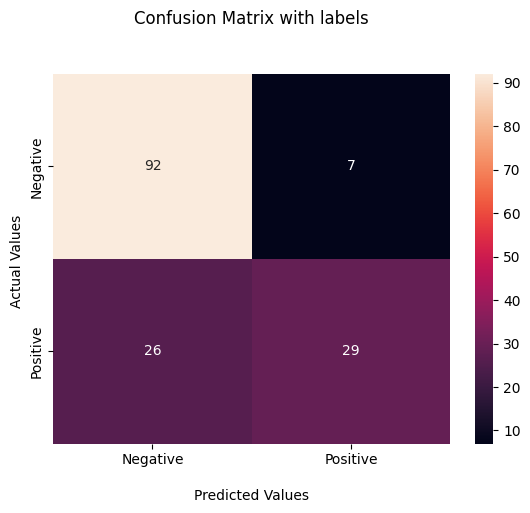

Random Forest Model Classification Report: 



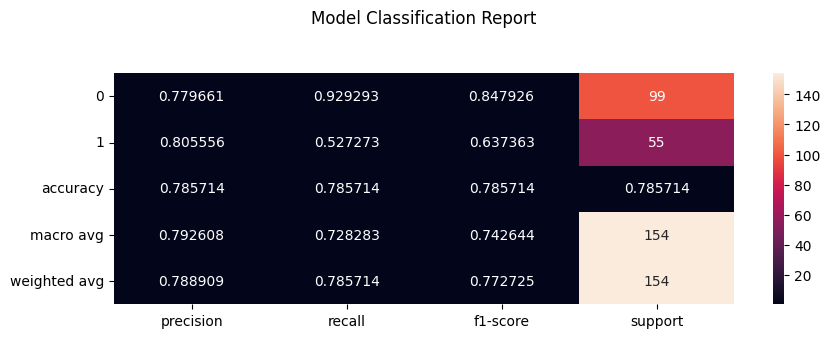

In [ ]:
# Creating a new Random Forest Classifier Model using tweaked parameters
rf_model_hyper = RandomForestClassifier(
                                  max_depth=3,
                                  max_features='auto',
                                  n_estimators=100,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                 )
rf_model_hyper.fit(X_train,y_train)


y_predicted_rf = rf_model_hyper.predict(X_test)
y_prob_rf = rf_model_hyper.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_predicted_rf)*100
print("Random Forest Model Test Set Accuracy:", round(accuracy,2), "%\n")

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted_rf)
print("Random Forest Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

# Plotting Classification Report
class_report = pd.DataFrame(classification_report(y_test, y_predicted_rf, output_dict=True)).transpose()
print("Random Forest Model Classification Report: \n")
class_report_plot(class_report)


## K-Nearest Neighbor (KNN)

### Basic Model

In [ ]:
# Initializing a KNeighborsClassifier
knn_model=KNeighborsClassifier()

# Fitting the model to train data
knn_model.fit(X_train,y_train)

# Predicting on the test set
y_pred_knn=knn_model.predict(X_test)

# Calculating the accuracy score
accuracy_score(y_test,y_pred_knn)

0.6948051948051948

In [ ]:
# Calculating Specifity and Sensitivity from Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

TP_knn = cm_knn[1, 1]
FP_knn = cm_knn[0, 1]
TN_knn = cm_knn[0, 0]
FN_knn = cm_knn[1, 0]

sensitivity_knn = TP_knn / (TP_knn + FN_knn)
specificity_knn = TN_knn / (TN_knn + FP_knn)

print(f"Sensitivity (Recall) for K-NN: {sensitivity_knn:.4f}")
print(f"Specificity for K-NN: {specificity_knn:.4f}")


Sensitivity (Recall) for K-NN: 0.5091
Specificity for K-NN: 0.7980


### Hyperparameter Tuned Model

The maximum accuracy is 76.62337662337663 when the K value is [21, 47] after feature selection.



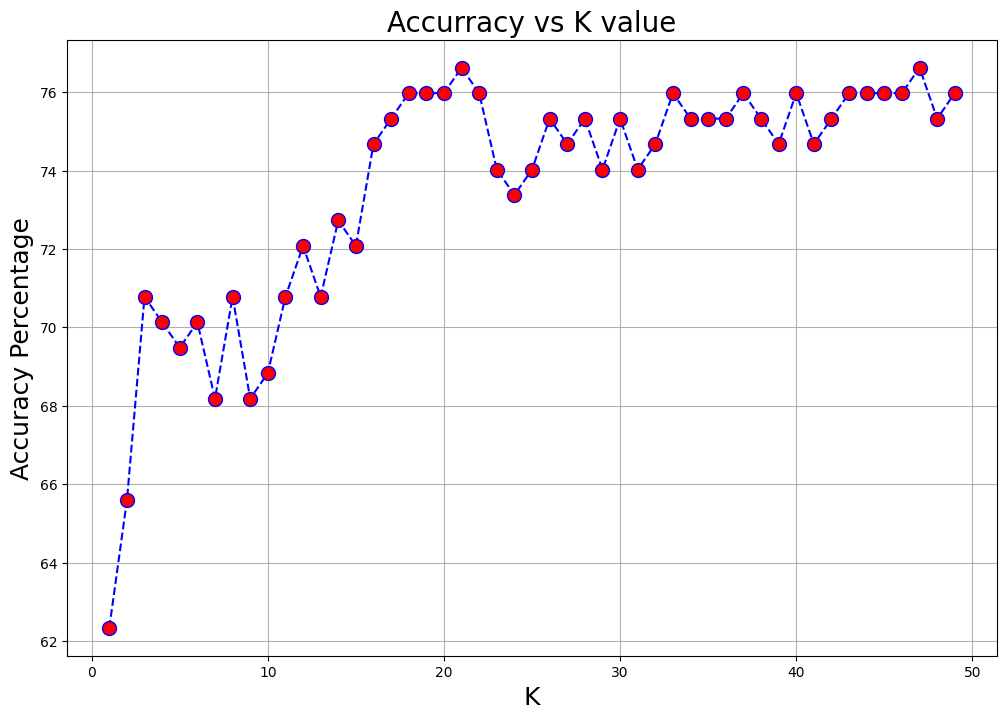

In [ ]:
# Define the best value of K in KNN
score_list = []

# Iterating through a range of values for k
for k in range(1,50):
    # Initialize a KNeighborsClassifier with current k value
    model = KNeighborsClassifier(n_neighbors=k)

    # Fitting the model to the training data
    model.fit(X_train,y_train)

    # Calculating the accuracy score on the test set
    score = model.score(X_test, y_test)

    score_list.append(score*100)

# Finding the maximum accuracy score
max_score = max(score_list)

# Finding the corresponding k values
k = [idx+1 for idx, score in enumerate(score_list) if score == max_score]
print(f'The maximum accuracy is {max_score} when the K value is {k} after feature selection.\n')

# Plotting the accuracy scores against k values
plt.figure(figsize=(12,8))
plt.plot(range(1,50), score_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accurracy vs K value',size=20)
plt.xlabel('K',size=18)
plt.ylabel('Accuracy Percentage',size=18)
plt.grid()
plt.show()

K Nearest Neighbor Model Test Set Accuracy:  76.62 %

K Nearest Neighbor Model Confusion Matrix: 



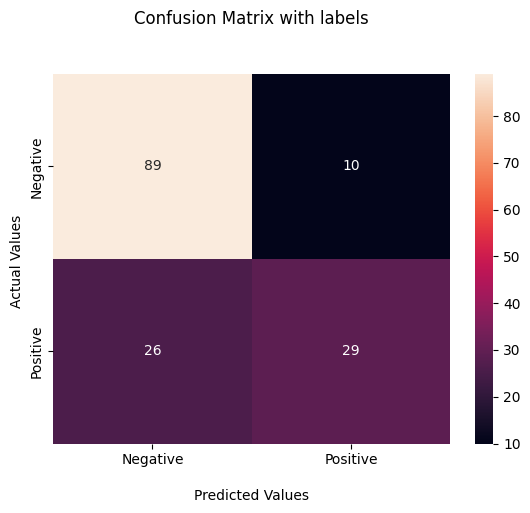

K Nearest Neighbor Model Classification Report: 



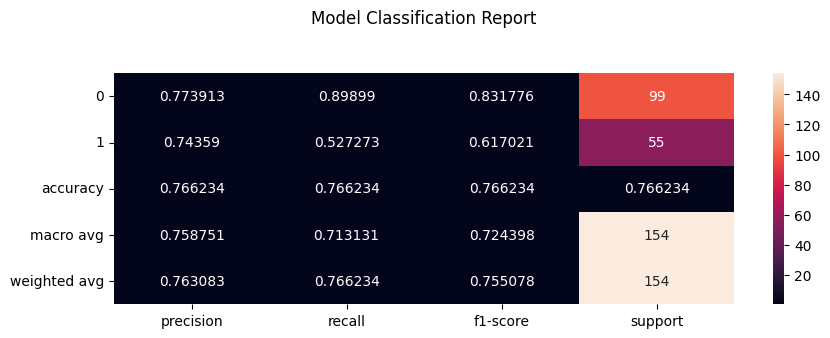

In [ ]:
# Creating a new KNeighbors Classifier Model using tweaked parameters
knn_model_hyper = KNeighborsClassifier(21)

knn_model_hyper.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = knn_model_hyper.predict(X_test)


y_predicted_knn = knn_model_hyper.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

# Plotting Classification Report
class_report = pd.DataFrame(classification_report(y_test, y_predicted_knn, output_dict=True)).transpose()
print("K Nearest Neighbor Model Classification Report: \n")
class_report_plot(class_report)


##XGBoost Classifier

###Basic Model

In [ ]:
#Training using XGBoost Classifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)


#predicting on train and test values if X and evaluating accuracy score
y_pred_xgb=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

0.7077922077922078

In [ ]:
#evaluating Sensitivity and Specificity from Confusion Matrix
cm_xgboost = confusion_matrix(y_test, y_pred_xgb)

TP_xgboost = cm_xgboost[1, 1]
FP_xgboost = cm_xgboost[0, 1]
TN_xgboost = cm_xgboost[0, 0]
FN_xgboost = cm_xgboost[1, 0]

sensitivity_xgboost = TP_xgboost / (TP_xgboost + FN_xgboost)
specificity_xgboost = TN_xgboost / (TN_xgboost + FP_xgboost)

print(f"Sensitivity (Recall) for XGBoost: {sensitivity_xgboost:.4f}")
print(f"Specificity for XGBoost: {specificity_xgboost:.4f}")


Sensitivity (Recall) for XGBoost: 0.6545
Specificity for XGBoost: 0.7374


### Hyperparameter Tuned Model

In [ ]:
np.random.seed(0)

# Defining a dictionary of parameter ranges for RandomizedSearchCV
parameters = {
        'colsample_bytree': (0.1,0.2,0.3,0.4,0.5),
        'max_depth': [2,4,6,8,10],
        'min_child_weight': [1,3,5,7,9],
        'subsample':(0.5,0.6,0.7,0.8),
         'gamma':(0,0.1,0.2,0.3,0.5),
       'learning_rate':(0.1,0.2,0.3)
 }

# Initializing RandomizedSearchCV with XGBoost model, parameters, and cross-validation
random = RandomizedSearchCV(xgb_model, parameters, n_iter=30, cv=5)

# Fitting RandomizedSearchCV to the training data
random.fit(X_train,y_train)

df1= pd.concat([pd.DataFrame(random.cv_results_['params']), pd.DataFrame(random.cv_results_['mean_test_score']*100, columns=['Accuracy'])] ,axis=1)

# Display only the first row
display(df1.sort_values('Accuracy', ascending=False).head(1))

,subsample,min_child_weight,max_depth,learning_rate,gamma,colsample_bytree,Accuracy
23,0.6,7,10,0.2,0.5,0.2,77.202452


Validation set accuracy after hyperparameter tuning:  72.73 %

XGBoost Model Test set accuracy:  72.73 %

XGBoost Model Confusion Matrix: 



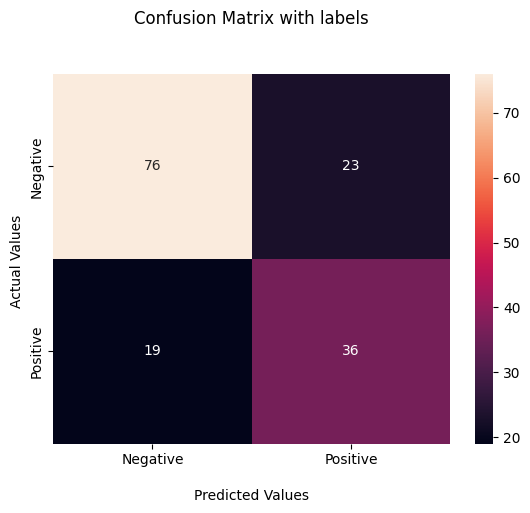

XGBoost Model Classification Report: 



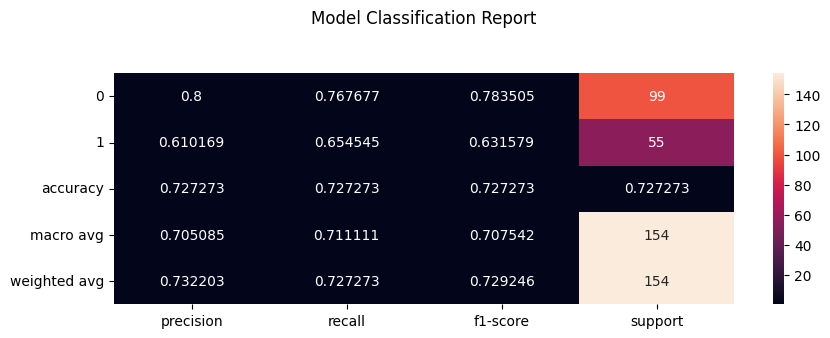

In [ ]:
# Creating a new XGBClassifier Model using tweaked parameters
xgb_model_hyper = XGBClassifier(
                         max_depth=10,
                         subsample=0.6,
                         min_child_weight=7,
                         learning_rate=0.2,
                         gamma=0.5,
                         colsample_bytree=0.2
                         )

xgb_model_hyper.fit(X_train,y_train)

y_val_pred = xgb_model_hyper.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_xgboost = xgb_model_hyper.predict(X_test)
y_prob_xgboost = xgb_model_hyper.predict_proba(X_test)[:, 1]
accuracy = xgb_model_hyper.score(X_test,y_test)*100
print("XGBoost Model Test set accuracy: ", round(accuracy,2), "%\n")

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted_xgboost)
print("XGBoost Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

# Plotting Classification Report
class_report = pd.DataFrame(classification_report(y_test, y_predicted_xgboost, output_dict=True)).transpose()
print("XGBoost Model Classification Report: \n")
class_report_plot(class_report)


# Comparitive Analysis

## AUC ROC Plot

0.825


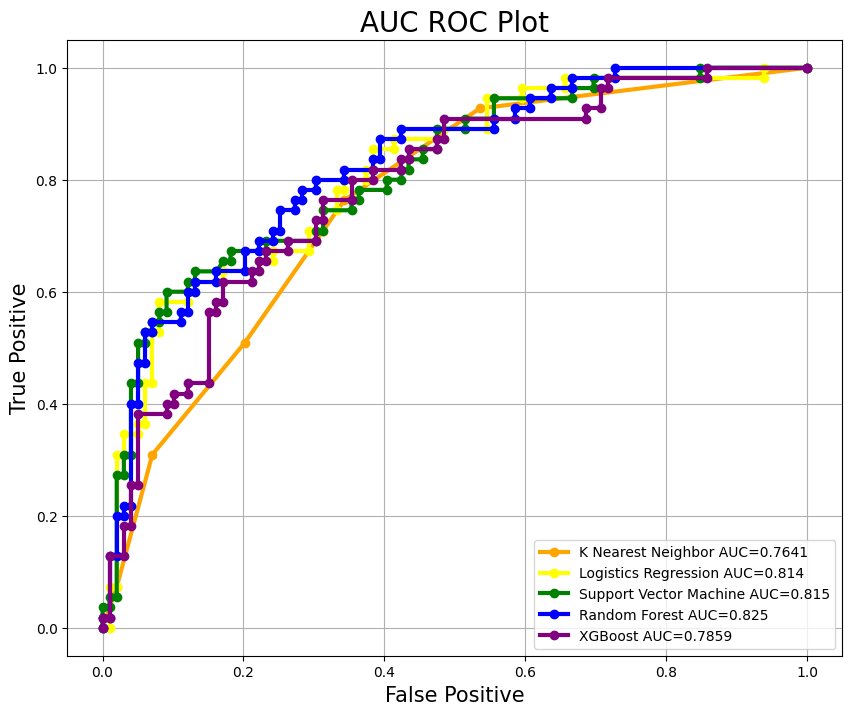

In [ ]:
# Plotting AUC ROC

y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob_knn, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_prob_lr, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_prob_svm, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_prob_xgboost, pos_label=1)


auc2 = round(roc_auc_score(y_test, y_prob_knn), 4)
auc3 = round(roc_auc_score(y_test, y_prob_lr), 4)
auc4 = round(roc_auc_score(y_test, y_prob_svm), 4)
auc5 = round(roc_auc_score(y_test, y_prob_rf), 4)
auc6 = round(roc_auc_score(y_test, y_prob_xgboost), 4)

print(auc5)

plt.figure(figsize=(10,8))


plt.plot(fpr2,tpr2,color='orange', linestyle='-', marker='o', linewidth=3, label= "K Nearest Neighbor AUC="+str(auc2))
plt.plot(fpr3,tpr3,color='yellow', linestyle='-', marker='o', linewidth=3, label= "Logistics Regression AUC="+str(auc3))
plt.plot(fpr4,tpr4,color='green', linestyle='-', marker='o', linewidth=3, label= "Support Vector Machine AUC="+str(auc4))
plt.plot(fpr5,tpr5,color='blue', linestyle='-', marker='o', linewidth=3, label= "Random Forest AUC="+str(auc5))
plt.plot(fpr6,tpr6,color='purple', linestyle='-', marker='o', linewidth=3, label= "XGBoost AUC="+str(auc6))


plt.grid()
plt.legend(loc='best')
plt.title('AUC ROC Plot',size=20)
plt.xlabel('False Positive',size=15)
plt.ylabel('True Positive',size=15)
plt.show()



## Accuracy, F1, Recall, Precision

In [ ]:
#creating a list of all the classification models we have used above
Models=[logr_model,svm_model,rf_model,knn_model,xgb_model]

In [ ]:
model_cols = ["Model Name", "Model Test Accuracy", "Model Precision", "Model Recall", "Model F1 Score", "Model AUC"]
model_compare = pd.DataFrame(columns=model_cols)

row_index = 0
for alg in Models:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)

    # Getting the name of the model
    model_name = alg.__class__.__name__

    # Storing model evaluation metrics in the model_compare DataFrame
    model_compare.loc[row_index, "Model Name"] = model_name
    model_compare.loc[row_index, "Model Test Accuracy"] = round(accuracy_score(y_test, predicted), 4)
    model_compare.loc[row_index, "Model Precision"] = round(precision_score(y_test, predicted), 4)
    model_compare.loc[row_index, "Model Recall"] = round(recall_score(y_test, predicted), 4)
    model_compare.loc[row_index, "Model F1 Score"] = round(f1_score(y_test, predicted), 4)
    model_compare.loc[row_index, "Model AUC"] = auc(fp, tp)

    row_index += 1

# Sorting the model comparison DataFrame by test accuracy in descending order
model_compare.sort_values(by="Model Test Accuracy", ascending=False, inplace=True)

display(model_compare)


,Model Name,Model Test Accuracy,Model Precision,Model Recall,Model F1 Score,Model AUC
2,RandomForestClassifier,0.7727,0.6724,0.7091,0.6903,0.758586
1,SVC,0.7662,0.6792,0.6545,0.6667,0.741414
0,LogisticRegression,0.7532,0.6491,0.6727,0.6607,0.735354
4,XGBClassifier,0.7078,0.5806,0.6545,0.6154,0.69596
3,KNeighborsClassifier,0.6948,0.5833,0.5091,0.5437,0.653535


### Basic Vs Tuned

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_cols = ["Model Name", "Model Type", "Model Test Accuracy", "Model Precision", "Model Recall", "Model F1 Score", "Model AUC"]
model_compare = pd.DataFrame(columns=model_cols)

row_index = 0

# List of models with basic configurations
basic_models = [LogisticRegression(max_iter=1000),
                KNeighborsClassifier(),
                SVC(),
                RandomForestClassifier(),
                XGBClassifier()]

# List of models with hyperparameter-tuned configurations
tuned_models = [LogisticRegression(max_iter=1000, C=1, penalty='l2', solver='lbfgs'),
                KNeighborsClassifier(n_neighbors=21),
                SVC(C=1000, kernel='rbf', gamma=0.0001, probability=True),
                RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=100, min_samples_leaf=1, min_samples_split=2),
                XGBClassifier(max_depth=10, subsample=0.6, min_child_weight=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2)]

for basic_model, tuned_model in zip(basic_models, tuned_models):
    # Fit and predict with basic model
    basic_predicted = basic_model.fit(X_train, y_train).predict(X_test)
    basic_fp, basic_tp, _ = roc_curve(y_test, basic_predicted)

    # Fit and predict with hyperparameter-tuned model
    tuned_predicted = tuned_model.fit(X_train, y_train).predict(X_test)
    tuned_fp, tuned_tp, _ = roc_curve(y_test, tuned_predicted)

    model_name = basic_model.__class__.__name__

    # Add basic model metrics to DataFrame
    model_compare.loc[row_index, "Model Name"] = model_name
    model_compare.loc[row_index, "Model Type"] = "Basic"
    model_compare.loc[row_index, "Model Test Accuracy"] = round(accuracy_score(y_test, basic_predicted), 4)
    model_compare.loc[row_index, "Model Precision"] = round(precision_score(y_test, basic_predicted), 4)
    model_compare.loc[row_index, "Model Recall"] = round(recall_score(y_test, basic_predicted), 4)
    model_compare.loc[row_index, "Model F1 Score"] = round(f1_score(y_test, basic_predicted), 4)
    model_compare.loc[row_index, "Model AUC"] = auc(basic_fp, basic_tp)

    row_index += 1

    # Add hyperparameter-tuned model metrics to DataFrame
    model_compare.loc[row_index, "Model Name"] = model_name
    model_compare.loc[row_index, "Model Type"] = "Tuned"
    model_compare.loc[row_index, "Model Test Accuracy"] = round(accuracy_score(y_test, tuned_predicted), 4)
    model_compare.loc[row_index, "Model Precision"] = round(precision_score(y_test, tuned_predicted), 4)
    model_compare.loc[row_index, "Model Recall"] = round(recall_score(y_test, tuned_predicted), 4)
    model_compare.loc[row_index, "Model F1 Score"] = round(f1_score(y_test, tuned_predicted), 4)
    model_compare.loc[row_index, "Model AUC"] = auc(tuned_fp, tuned_tp)

    row_index += 1

model_compare.sort_values(by=["Model Name", "Model Type", "Model Test Accuracy"], ascending=[True, True, False], inplace=True)
display(model_compare)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model Name,Model Type,Model Test Accuracy,Model Precision,Model Recall,Model F1 Score,Model AUC
2,KNeighborsClassifier,Basic,0.6948,0.5833,0.5091,0.5437,0.653535
3,KNeighborsClassifier,Tuned,0.7662,0.7436,0.5273,0.617,0.713131
0,LogisticRegression,Basic,0.7532,0.6491,0.6727,0.6607,0.735354
1,LogisticRegression,Tuned,0.7532,0.6491,0.6727,0.6607,0.735354
6,RandomForestClassifier,Basic,0.7792,0.678,0.7273,0.7018,0.767677
7,RandomForestClassifier,Tuned,0.8182,0.8293,0.6182,0.7083,0.773737
4,SVC,Basic,0.7338,0.6458,0.5636,0.6019,0.69596
5,SVC,Tuned,0.7662,0.6792,0.6545,0.6667,0.741414
8,XGBClassifier,Basic,0.7078,0.5806,0.6545,0.6154,0.69596
9,XGBClassifier,Tuned,0.7273,0.6102,0.6545,0.6316,0.711111


## Confusion Matrices,Sensitivity and Specificity

In [ ]:
# Assuming y_true contains the true labels and y_pred_<model> contains the predicted labels for each model

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classification', 'Random Forest', 'XGBoost']
y_preds = [y_pred_logR, y_pred_knn, y_pred_svm, y_pred_rf, y_pred_xgb]  # Replace with your actual predicted labels
y_trues = [y_test, y_test, y_test, y_test, y_test]  # Replace with your actual true labels

results = []

for model, y_pred, y_true in zip(models, y_preds, y_trues):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    results.append({
        'Model': model,
        'True Positive': tp,
        'False Positive': fp,
        'False Negative': fn,
        'True Negative': tn,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)
display(results_df)


,Model,True Positive,False Positive,False Negative,True Negative,Sensitivity,Specificity
0,Logistic Regression,37,20,18,79,0.672727,0.797980
1,K-Nearest Neighbors,28,20,27,79,0.509091,0.797980
2,Support Vector Classification,31,17,24,82,0.563636,0.828283
3,Random Forest,35,22,20,77,0.636364,0.777778
4,XGBoost,36,26,19,73,0.654545,0.737374
